In [1]:
import pandas as pd
import numpy as np
import sys
from pathlib import Path
import matplotlib.pyplot as plt
sys.path.append(str(Path("..").resolve()))
from db.database import Database
db = Database()

In [3]:
bp_df = pd.read_pickle("output/bp_clusters_63.pkl")
bp_df.head()

,blueprint_code,blueprint_url,post_id,description,topic_keywords,keywords_tfidf,blueprint_hash,id,name,extracted_keywords,keywords_yake,topic_title,topic_id,tags,created_at,post_content,processed_keywords,features,embeddings,cluster
0,blueprint:\n name: Nag prompt blueprint\n de...,https://community.home-assistant.io//t/nag-pro...,1220860,Nag a mobile device to do something,"{""nag"": 0.66021433671546, ""prompt"": 0.23634566...","{""nag"": 0.8500419399246807, ""prompt"": 0.303868...",2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,1,Nag prompt blueprint,"{""input__input_boolean"": 2}","[""android notification"", ""nag prompt"", ""nag no...",Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...,"[""boolean""]",android notification nag prompt nag notificati...,"[0.014847068, -0.022897178, 0.048354134, -0.08...",21
1,blueprint:\n name: Inovelli \n description: ...,https://community.home-assistant.io//t/inovell...,1220678,Use this blueprint to create automations based...,"{""inovelli"": 0.49695533075954657, ""lzw36"": 0.4...","{""lzw36"": 0.44023949481589464, ""inovelli"": 0.4...",ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,2,Inovelli,{},"[""fan"", ""inovelli"", ""create"", ""dimmer""]",Inovelli LZW36 Fan/Dimmer Scenes,254999,[],2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...,null,fan inovelli create dimmer <PAD> <PAD> <PAD> <...,"[-0.003354809, -0.042484034, 0.006757784, 0.02...",27
2,blueprint:\n name: deCONZ - IKEA five button ...,https://community.home-assistant.io//t/deconz-...,1223455,Control anything using IKEA five button remote\n,"{""button"": 0.47028047688169866, ""five"": 0.3549...","{""five"": 0.5604759426620674, ""ikea"": 0.4331904...",c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,3,deCONZ - IKEA five button remote,"{""input__deconz"": 1}","[""button short"", ""button remote"", ""long press""...",deCONZ - IKEA five button remote,255699,"[switch, deconz]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community...","[""deconz""]",button short button remote long press button i...,"[-0.012624783, -0.056538995, -0.048684914, -0....",31
3,blueprint:\n name: Heat for certain time\n d...,https://community.home-assistant.io//t/set-hea...,1223628,Turn on heating for a given amount of time.,"{""heat"": 0.3484675281776271, ""heating"": 0.3360...","{""heat"": 0.44290156715634094, ""heating"": 0.430...",00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,4,Heat for certain time,"{""input__input_datetime"": 1, ""input__climate"": 2}","[""set heating"", ""heating temperature"", ""time"",...",Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the...","[""datetime"", ""climate""]",set heating heating temperature time set input...,"[0.0353796, 0.0043165493, -0.06099803, 0.02109...",4
4,blueprint:\n name: Light Allowance\n descrip...,https://community.home-assistant.io//t/light-a...,1224871,Turns a light off after an allotted time,"{""allotted"": 0.6330710810698282, ""allowance"": ...","{""allotted"": 0.6465282359948884, ""allowance"": ...",0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,5,Light Allowance,"{""input__light"": 1, ""output__light"": 1}","[""light allowance"", ""light"", ""allowance"", ""all...",Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...,"[""light"", ""light""]",light allowance light allowance allotted input...,"[0.033667807, 0.0035050716, -0.048893932, -0.0...",15


In [4]:
import json, re
def process_bp_keywords(kwd_dict: dict[str, int] | str) -> list[str] | None:
    if isinstance(kwd_dict, str):
        kwd_dict = json.loads(kwd_dict)
    
    kwd_list = list(kwd_dict.keys())
    if kwd_list.__len__() < 1:
        return None
    
    kwds = []
    
    for kwd in kwd_list:
        in_out = re.search(r"(input__|output__)(input_|output_)?", kwd)
        kwd = kwd.removeprefix(in_out.group()) if in_out else kwd
        in_out = in_out.group(1) if in_out else None
        kwds.append(in_out + kwd if in_out else kwd)
    return kwds
bp_df["processed_keywords"] = bp_df["extracted_keywords"].apply(process_bp_keywords)
bp_df.head()

,blueprint_code,blueprint_url,post_id,description,topic_keywords,keywords_tfidf,blueprint_hash,id,name,extracted_keywords,keywords_yake,topic_title,topic_id,tags,created_at,post_content,processed_keywords,features,embeddings,cluster
0,blueprint:\n name: Nag prompt blueprint\n de...,https://community.home-assistant.io//t/nag-pro...,1220860,Nag a mobile device to do something,"{""nag"": 0.66021433671546, ""prompt"": 0.23634566...","{""nag"": 0.8500419399246807, ""prompt"": 0.303868...",2f523787adf856fbddd08b2f7b32aa2490eb48a236bc68...,1,Nag prompt blueprint,"{""input__input_boolean"": 2}","[""android notification"", ""nag prompt"", ""nag no...",Nag prompt Blueprint (Android Notification),255041,[],2020-12-14 01:40:32.358,<p>This blueprints creates configurable nag no...,[input__boolean],android notification nag prompt nag notificati...,"[0.014847068, -0.022897178, 0.048354134, -0.08...",21
1,blueprint:\n name: Inovelli \n description: ...,https://community.home-assistant.io//t/inovell...,1220678,Use this blueprint to create automations based...,"{""inovelli"": 0.49695533075954657, ""lzw36"": 0.4...","{""lzw36"": 0.44023949481589464, ""inovelli"": 0.4...",ca6a74b04fac9cee0925adfe7cb03c8beb0354a816fa66...,2,Inovelli,{},"[""fan"", ""inovelli"", ""create"", ""dimmer""]",Inovelli LZW36 Fan/Dimmer Scenes,254999,[],2020-12-13 22:32:38.158,<p>This blueprint allows you to easily create ...,None,fan inovelli create dimmer <PAD> <PAD> <PAD> <...,"[-0.003354809, -0.042484034, 0.006757784, 0.02...",27
2,blueprint:\n name: deCONZ - IKEA five button ...,https://community.home-assistant.io//t/deconz-...,1223455,Control anything using IKEA five button remote\n,"{""button"": 0.47028047688169866, ""five"": 0.3549...","{""five"": 0.5604759426620674, ""ikea"": 0.4331904...",c5f67655e23dff66b1042d3b38e967d74dad01a4a3d589...,3,deCONZ - IKEA five button remote,"{""input__deconz"": 1}","[""button short"", ""button remote"", ""long press""...",deCONZ - IKEA five button remote,255699,"[switch, deconz]",2020-12-15 12:18:15.898,"<p>This is a mix of <a href=""https://community...",[input__deconz],button short button remote long press button i...,"[-0.012624783, -0.056538995, -0.048684914, -0....",31
3,blueprint:\n name: Heat for certain time\n d...,https://community.home-assistant.io//t/set-hea...,1223628,Turn on heating for a given amount of time.,"{""heat"": 0.3484675281776271, ""heating"": 0.3360...","{""heat"": 0.44290156715634094, ""heating"": 0.430...",00b1c4d2e847ed9451c8e8d1acfbbcd5e1740f9991226d...,4,Heat for certain time,"{""input__input_datetime"": 1, ""input__climate"": 2}","[""set heating"", ""heating temperature"", ""time"",...",Set heating temperature to a configurable valu...,255742,[],2020-12-15 14:23:53.414,"<p>This is a blueprint, that allows to set the...","[input__datetime, input__climate]",set heating heating temperature time set input...,"[0.0353796, 0.0043165493, -0.06099803, 0.02109...",4
4,blueprint:\n name: Light Allowance\n descrip...,https://community.home-assistant.io//t/light-a...,1224871,Turns a light off after an allotted time,"{""allotted"": 0.6330710810698282, ""allowance"": ...","{""allotted"": 0.6465282359948884, ""allowance"": ...",0dd0ec70d42f2e8a428ae7a2934852dbec0beb34cd03cc...,5,Light Allowance,"{""input__light"": 1, ""output__light"": 1}","[""light allowance"", ""light"", ""allowance"", ""all...",Light Allowance,256045,[],2020-12-16 04:23:36.519,<p>This blueprint will turn a light off after ...,"[input__light, output__light]",light allowance light allowance allotted input...,"[0.033667807, 0.0035050716, -0.048893932, -0.0...",15


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import MultiLabelBinarizer
X = bp_df[["id", "keywords_yake", "tags", "processed_keywords"]]
label_binarizer = MultiLabelBinarizer()
transformed_dfs = [X[["id"]]]

yake_transformed = pd.DataFrame(
    label_binarizer.fit_transform(
        X["keywords_yake"].fillna("").apply(lambda x: x if isinstance(x, list) else [])
    ),
    columns=label_binarizer.classes_,
    index=X.index
)
transformed_dfs.append(yake_transformed)

tags_transformed = pd.DataFrame(
    label_binarizer.fit_transform(
        X["tags"].fillna("").apply(lambda x: x if isinstance(x, list) else [])
    ),
    columns=label_binarizer.classes_,
    index=X.index
)
transformed_dfs.append(tags_transformed)

proc_kwd_transformed = pd.DataFrame(
    label_binarizer.fit_transform(
        X["processed_keywords"].fillna("").apply(lambda x: x if isinstance(x, list) else [])
    ),
    columns=label_binarizer.classes_,
    index=X.index
)
transformed_dfs.append(proc_kwd_transformed)

X = pd.concat(transformed_dfs, axis=1).drop(columns=["id"])

y = bp_df["cluster"]
X.head()

,addon,ai,alarm,alexa,android,aqara,assist,automating-lights,backup,binary_sensor,...,output__tesla_custom,output__tessie,output__text,output__timer,output__tts,output__vacuum,output__weather,output__wled,output__zha,output__zwave_js
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      0.67      0.36         3
           2       0.86      0.86      0.86        14
           3       0.50      0.20      0.29         5
           4       0.69      0.90      0.78        10
           5       0.57      0.67      0.62         6
           6       0.06      0.67      0.10         3
           7       1.00      1.00      1.00         1
           8       0.67      0.31      0.42        13
           9       0.62      0.57      0.59        14
          10       0.75      0.60      0.67         5
          11       0.33      0.43      0.38         7
          12       0.00      0.00      0.00         1
          13       0.83      0.56      0.67         9
          14       1.00      1.00      1.00         1
          15       1.00      0.43      0.60         7
          16       1.00      0.38      0.55         8
          17       0.67    

c:\Users\Adrian\workspace-loc\dat300\BP-classification\bpclass\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adrian\workspace-loc\dat300\BP-classification\bpclass\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Adrian\workspace-loc\dat300\BP-classification\bpclass\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn

Accuracy: 46.63%


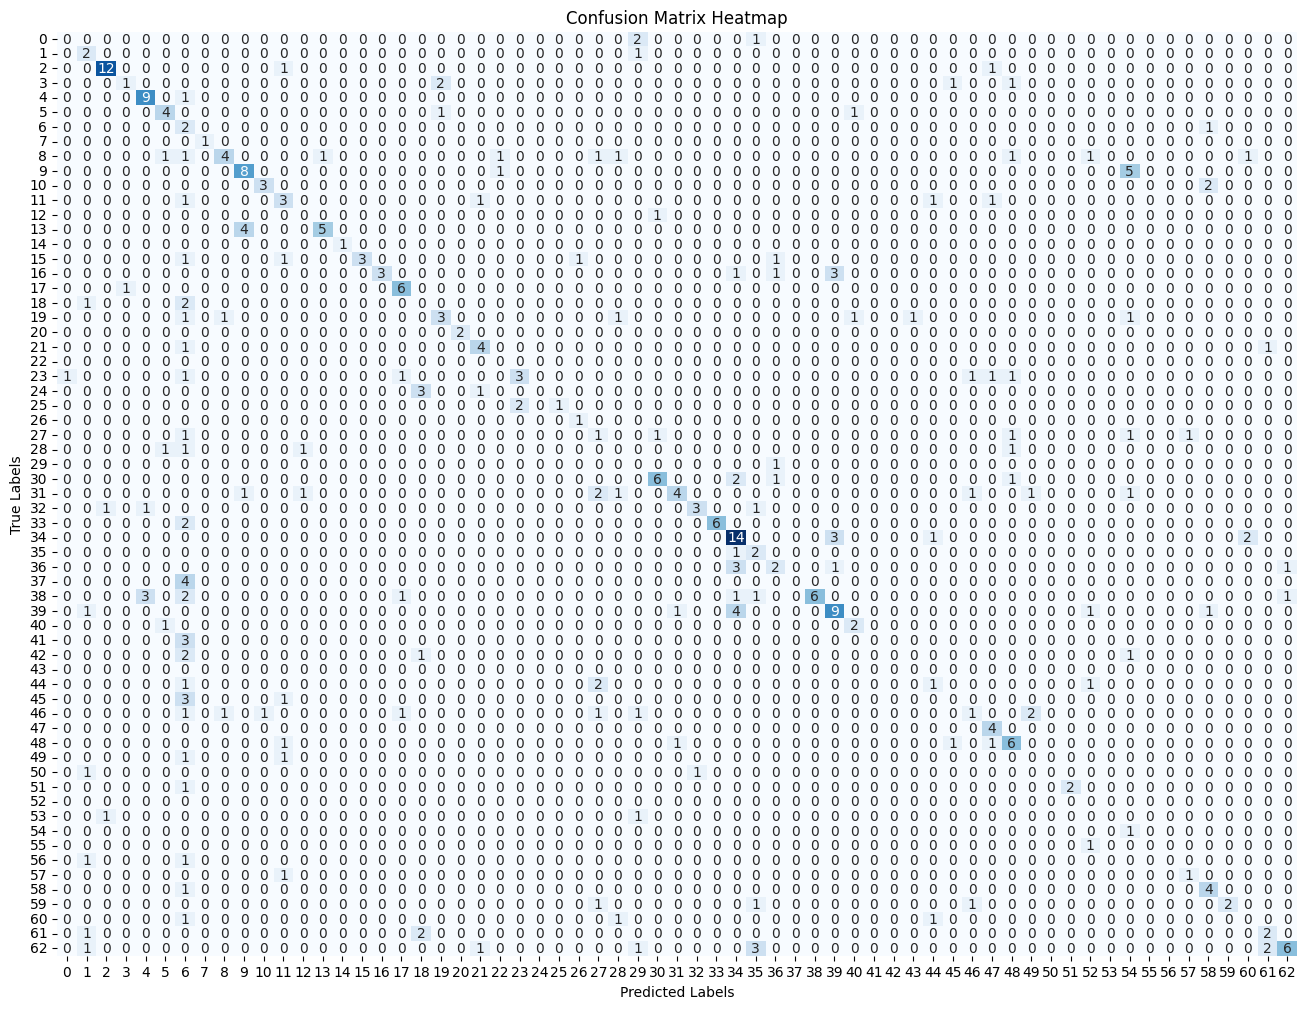

In [8]:
import seaborn as sns
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(16, 12))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)

plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

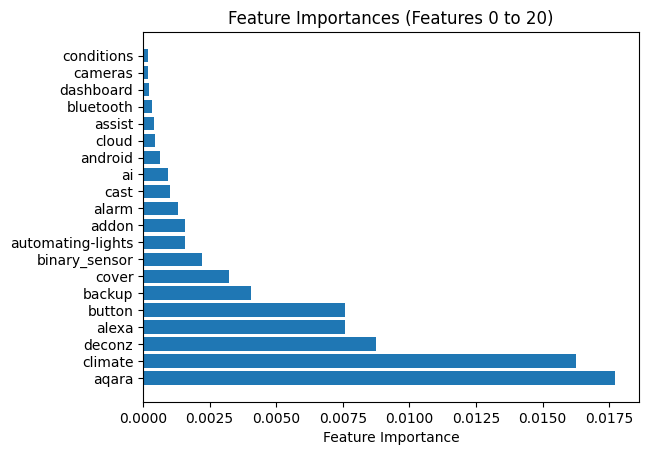

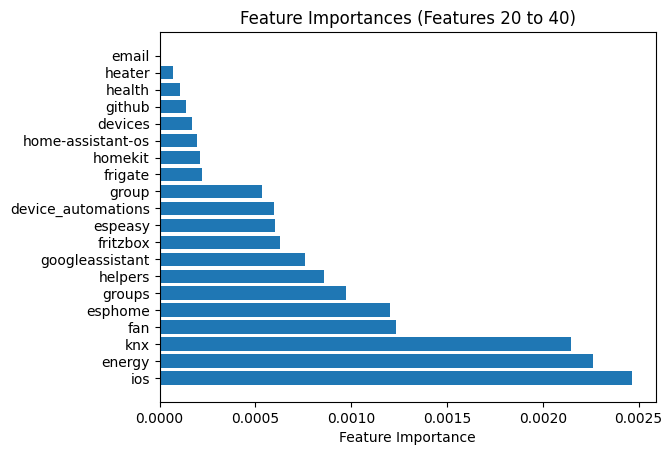

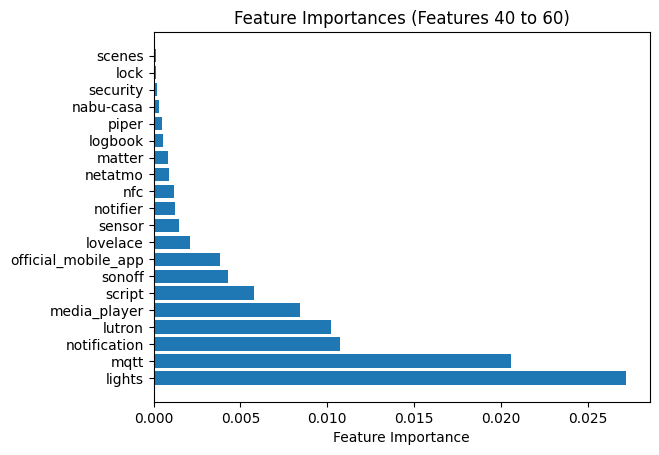

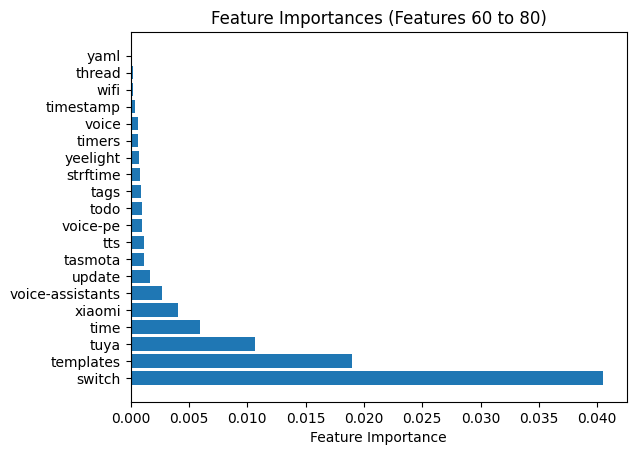

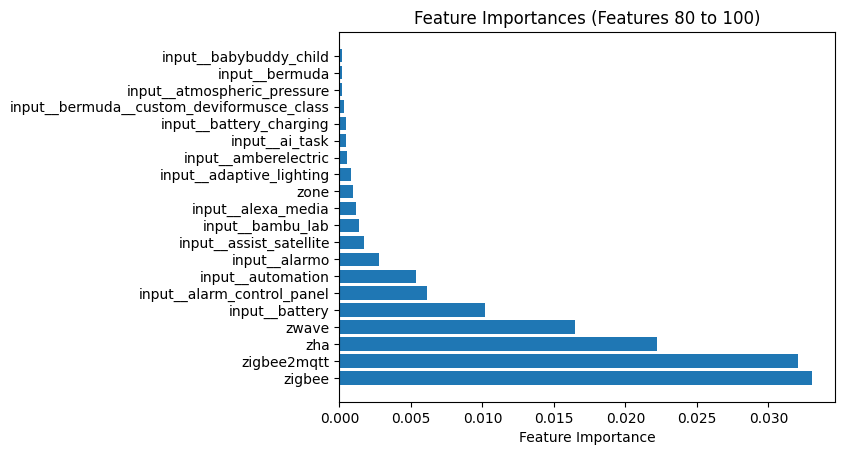

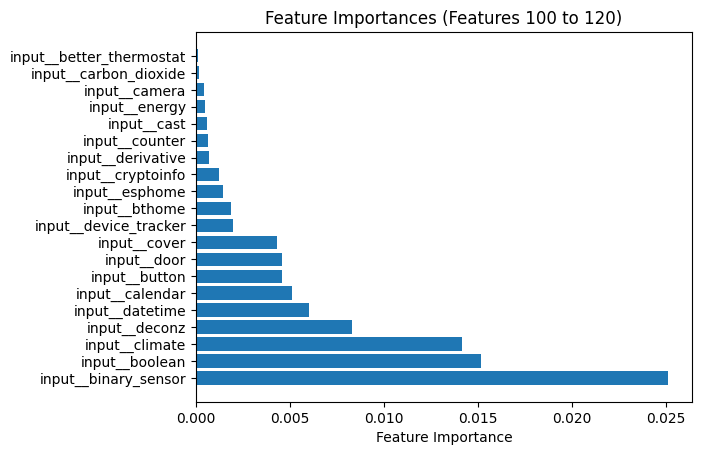

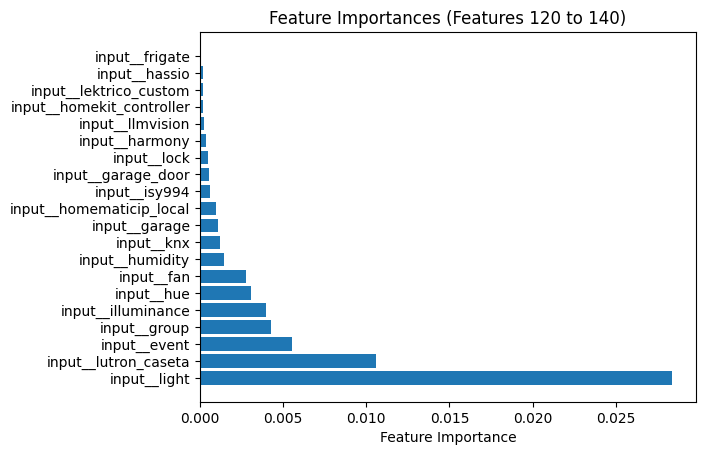

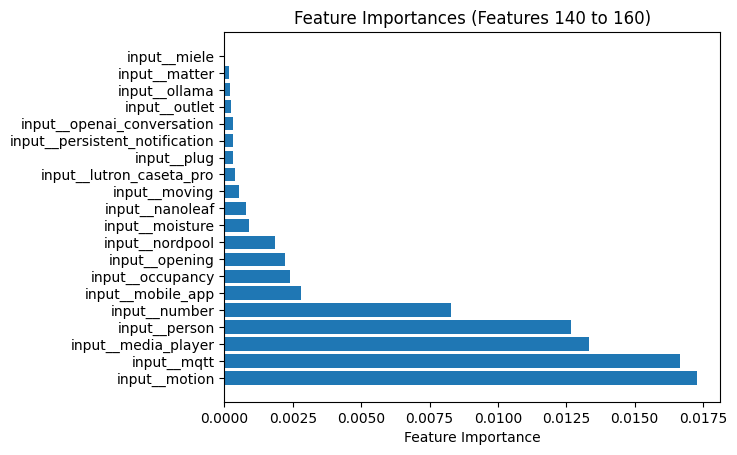

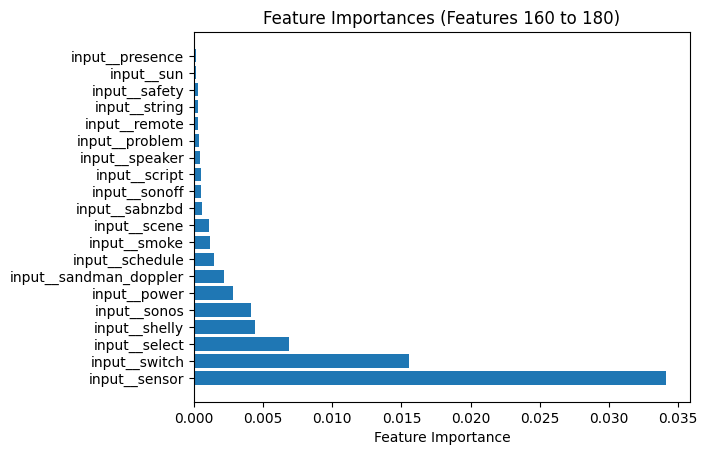

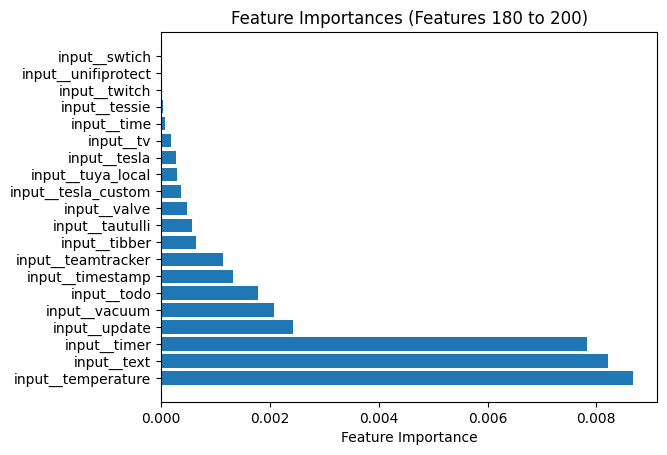

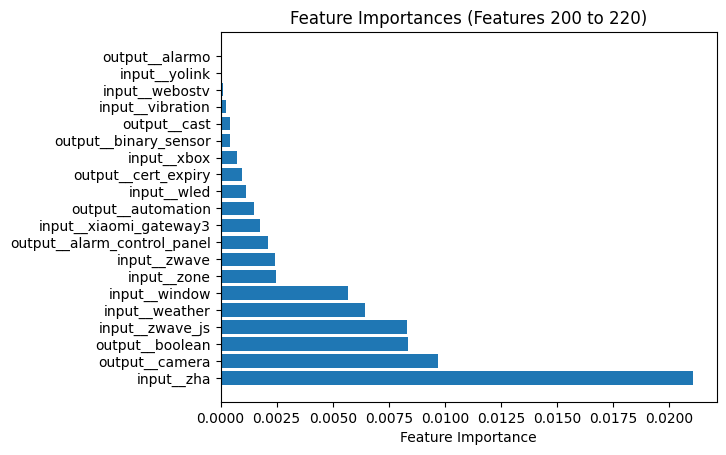

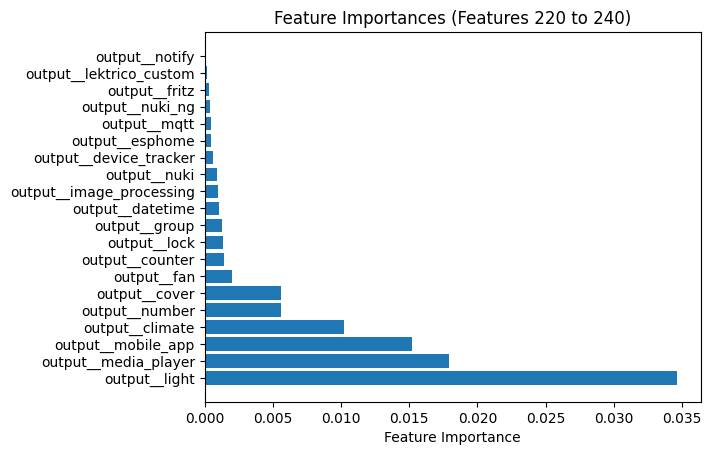

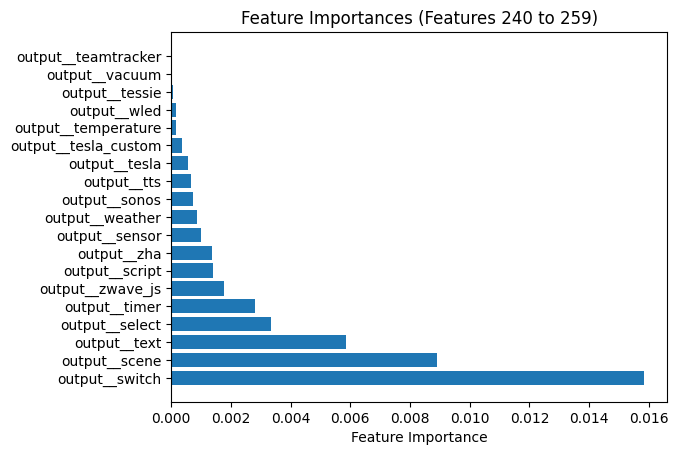

Index(['switch', 'output__light', 'input__sensor', 'zigbee', 'zigbee2mqtt',
       'input__light', 'lights', 'input__binary_sensor', 'zha', 'input__zha',
       'mqtt', 'templates', 'output__media_player', 'aqara', 'input__motion',
       'input__mqtt', 'zwave', 'climate', 'output__switch', 'input__switch'],
      dtype='object')

In [9]:
feature_importances = rf_model.feature_importances_

features_per_graph = 20
n_graphs = int(np.ceil(len(feature_importances) / features_per_graph))
for i in range(n_graphs):
    start_idx = i * features_per_graph
    end_idx = min((i + 1) * features_per_graph, len(feature_importances))

    indices = np.argsort(feature_importances[start_idx:end_idx])[::-1] + start_idx
    plt.barh(
        X.columns[start_idx:end_idx][indices - start_idx], 
        feature_importances[indices]
    )
    plt.xlabel("Feature Importance")
    plt.title(f"Feature Importances (Features {start_idx} to {end_idx})")
    plt.show()
most_important_indices = np.argsort(feature_importances)[::-1][:20]
X.columns[most_important_indices]

In [15]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline

def multiclass_roc_auc_score(y_true, y_score, average="macro"):
    # y_score shape: (n_samples, n_classes)
    # y_true shape: (n_samples,)
    # This will handle missing classes in a fold
    try:
        return roc_auc_score(y_true, y_score, multi_class="ovr", average=average)
    except ValueError:
        # If a fold is missing a class, return nan or 0
        return 0

clf = RandomForestClassifier(random_state=42, class_weight="balanced")
roc_auc_ovr = make_scorer(multiclass_roc_auc_score, needs_proba=True)

rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(10), scoring=roc_auc_ovr)

pipeline = Pipeline([
    ('feature_selection', rfecv),
    ('classification', clf)
])

param_grid = {
    'classification__n_estimators': [200, 500],
    'classification__max_features': ['auto', 'sqrt', 'log2'],
    'classification__max_depth': [4, 5, 6, 7, 8],
    'classification__criterion': ['gini', 'entropy']
}

c:\Users\Adrian\workspace-loc\dat300\BP-classification\bpclass\Lib\site-packages\sklearn\metrics\_scorer.py:548: FutureWarning: The `needs_threshold` and `needs_proba` parameter are deprecated in version 1.4 and will be removed in 1.6. You can either let `response_method` be `None` or set it to `predict` to preserve the same behaviour.
  warnings.warn(


In [16]:
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, 
                           cv=StratifiedKFold(10), n_jobs=-1, scoring='roc_auc_ovr')
grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

c:\Users\Adrian\workspace-loc\dat300\BP-classification\bpclass\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


KeyboardInterrupt: 